In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel("placement.xlsx")

In [3]:
df.shape

(100, 5)

In [4]:
df

,Unnamed: 0,Student_ID,CGPA,IQ,Placement
0,2,1,6.8,123,1
1,3,2,5.9,106,0
2,4,3,5.3,121,0
3,5,4,7.4,132,1
4,6,5,5.8,142,0
...,...,...,...,...,...
95,97,96,4.3,200,0
96,98,97,4.4,42,0
97,99,98,6.7,182,1
98,100,99,6.3,103,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   Student_ID  100 non-null    int64  
 2   CGPA        100 non-null    float64
 3   IQ          100 non-null    int64  
 4   Placement   100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


In [6]:
df  = df.iloc[:,1:]

In [7]:
df

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0
...,...,...,...,...
95,96,4.3,200,0
96,97,4.4,42,0
97,98,6.7,182,1
98,99,6.3,103,1


In [8]:
df  = df.iloc[:,1:]

In [9]:
df

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0
...,...,...,...
95,4.3,200,0
96,4.4,42,0
97,6.7,182,1
98,6.3,103,1


In [10]:
import matplotlib.pyplot as plt

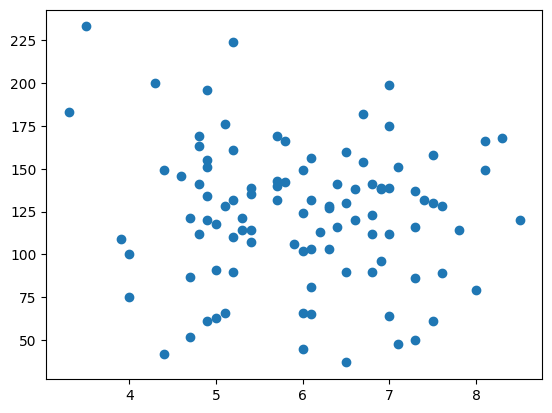

In [11]:
plt.scatter(df["CGPA"],df["IQ"])

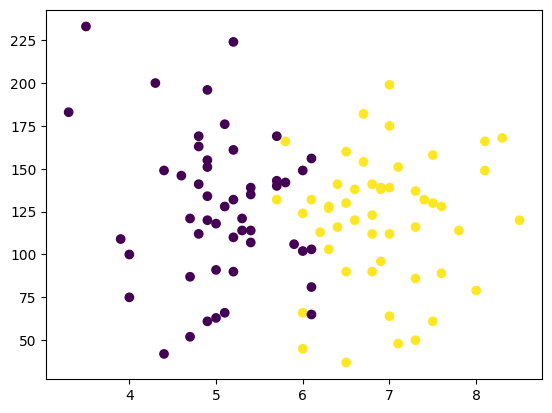

In [12]:
plt.scatter(df["CGPA"],df["IQ"],c=df["Placement"])

In [14]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [15]:
x

,CGPA,IQ
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [16]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: Placement, Length: 100, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scalar = StandardScaler()

In [22]:
x_train = scalar.fit_transform(x_train)

In [23]:
x_train

array([[ 0.05036711, -0.57578616],
       [ 2.18356233, -0.11767237],
       [-1.0162305 ,  0.71771161],
       [-1.0162305 ,  1.93036576],
       [ 1.82802979,  1.12192966],
       [-0.21628229,  1.12192966],
       [ 0.85031532,  1.36446049],
       [ 0.67254905, -0.03682876],
       [-0.57181483, -0.46799468],
       [ 0.31701651,  0.44823291],
       [ 0.22813338,  0.09791059],
       [-1.46064617,  0.66381587],
       [ 0.40589965,  0.15180633],
       [ 0.67254905,  0.44823291],
       [-0.7495811 ,  0.20570207],
       [-1.46064617, -2.21960623],
       [ 0.93919845, -2.05791901],
       [-0.7495811 , -0.38715107],
       [-0.7495811 ,  2.68490612],
       [-0.83846423, -1.57285735],
       [-1.10511364,  1.20277327],
       [ 1.82802979,  0.66381587],
       [-0.03851602, -0.00988089],
       [ 0.76143218,  0.39433717],
       [ 0.49478278, -0.11767237],
       [ 1.11696472, -0.22546385],
       [-1.0162305 , -0.11767237],
       [-0.03851602, -2.13876262],
       [-0.66069796,

In [24]:
x_test = scalar.transform(x_test)

In [25]:
x_test

array([[-0.7495811 ,  0.98719031],
       [ 0.85031532,  2.01120937],
       [-1.81617871, -1.33032652],
       [-1.10511364,  0.44823291],
       [ 0.49478278,  0.36738929],
       [ 1.11696472, -2.00402327],
       [-1.10511364, -0.33325533],
       [ 0.40589965, -2.35434558],
       [-1.54952931,  2.03815724],
       [-1.19399677, -1.95012753]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()

In [29]:
clf.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred = clf.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, y_pred)

1.0

In [38]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

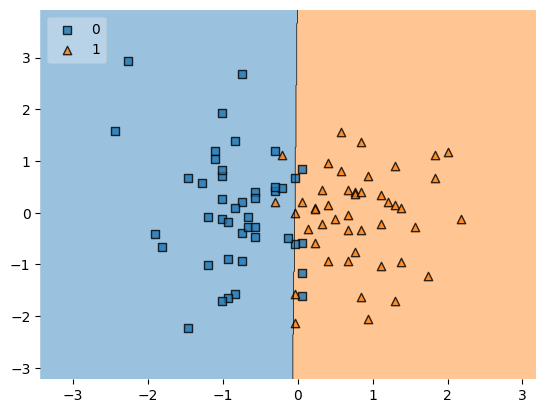

In [39]:
plot_decision_regions(x_train, y_train.values,clf=clf, legend=2)

In [40]:
import pickle

In [41]:
pickle.dump(clf, open("model.pkl", "wb"))